# CNN Skin Cancer Assignment 

**Problem statement:** 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of **2357** images of malignant and benign oncological diseases, which were formed from the **International Skin Imaging Collaboration (ISIC)**. All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
*   Actinic keratosis
*   Basal cell carcinoma
* 	Dermatofibroma
* 	Melanoma
* 	Nevus
* 	Pigmented benign keratosis
* 	Seborrheic keratosis
* 	Squamous cell carcinoma
* 	Vascular lesion




# **Process Steps followed in this Assignment**

1. Data Reading and Data Understanding
2. Dataset Creation
3. Dataset Visualization
4. Initial Model Building & Training
5. Data Augmentation
6. Model Building & Training on Augmented Data
7. Class Distribution
8. Handling Class Imbalances
9. Model Building & Training on Rectified Class Imbalance Data

# **1. Data Reading and Data Understanding**

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/Upgrad/CNN_assignment.zip

Archive:  gdrive/MyDrive/Upgrad/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('No of images in Training Set:',image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('No of images in Testing Set:',image_count_test)

No of images in Training Set: 2239
No of images in Testing Set: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

# **2. Dataset Creation**

### Create a dataset

Define some parameters for the loader:

For this assignment we are going to create train & validation dataset from the train directory with a batch size of 32 and images are resized to 180*180.

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

We are going to use the Tensorflow utility "***image_dataset_from_directory***" to create Training and Validation Datasets.


In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### **Inferences:**

1. The Input Dataset contains 2357 images. We have split that into Training (2239) and Test Sets (118).
2. Using the 2239 images present in Training set, we have split that into Train(80%) and Validation set (20%).
2. 2239 Training Set images belongs to 9 different Classes.
3. Class names are extracted using class_names attribute on Train Dataset and the different class names are listed below:

In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# **3. Dataset Visualization**

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

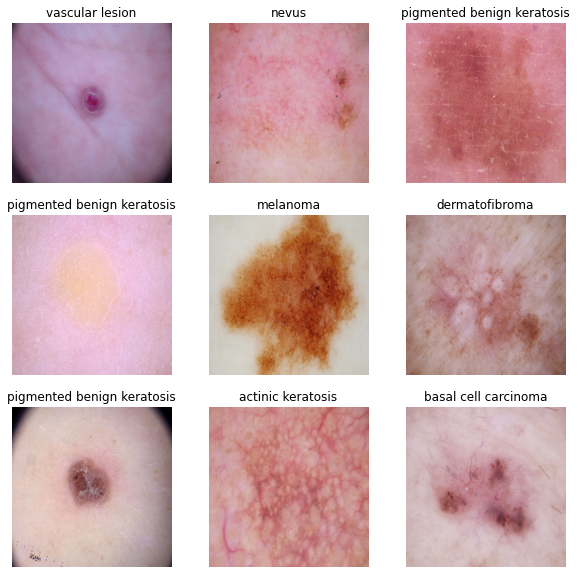

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **4. Initial Model Building & Training**

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
## Rescaling function is used to normalize the pixel values to (0,1).
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width,3)),
  layers.Conv2D(32, (3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Conv2D(32, (3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Conv2D(32, (3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer= 'Adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 47s 82ms/step - loss: 2.0595 - accuracy: 0.2085 - val_loss: 1.9795 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 1.7746 - accuracy: 0.3791 - val_loss: 1.7142 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 1.6403 - accuracy: 0.4149 - val_loss: 1.4951 - val_accuracy: 0.4743
Epoch 4/20
56/56 [==============================] - 1s 17ms/step - loss: 1.4528 - accuracy: 0.4727 - val_loss: 1.4118 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4195 - accuracy: 0.4900 - val_loss: 1.4080 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 1s 17ms/step - loss: 1.3118 - accuracy: 0.5532 - val_loss: 1.2996 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 1s 17ms/step - loss: 1.2115 - accuracy: 0.5653 - val_loss: 1.3350 - val_accuracy: 0.5302
Epoch 8/20
5

### Visualizing training results

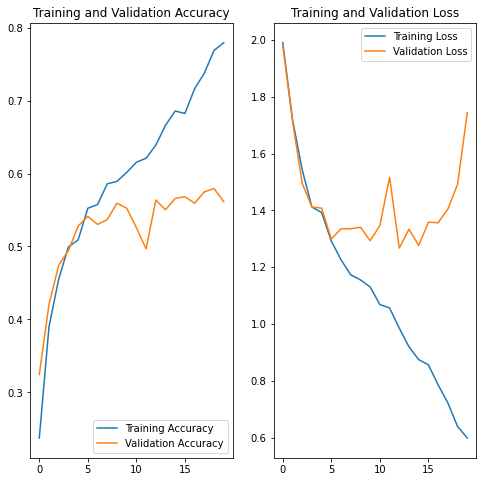

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### **Insights from the Initial Model Building:**

1. For the initial CNN model, have created 3 Convolution layers, 3 Pooling Layers and Fully Connected (FC) layer.
2. There are 2 types of optimizer algorithm: <br>
	  a.Gradient Descent Optimizer <br>
	  b.Adaptive Optimizer
3.  For my Initial model considered the Adaptive Learning optimizer algorithm which is "Adam".
4. The given problem is Multi-Class Classification Problem and for this model considered "SparseCategoricalCrossentropy" as the better/good Loss function.
5. For this intial CNN Model with the chosen optimizer and Loss function, we have compiled and Trained the model for 20 Epochs. 
6. By looking at the result, we got the Training Accuracy around 70-80 and Validation Accuracy comes around 50-55. Also, the difference in accuracy between training and validation accuracy is **high** and it is ***clear sign of overfitting.***
7. By looking at the accuracy scores, we could see that the Training Set seems to be learning well however the Model does not perform well on the Validation set.It is very clear from the result and also by looking at the above plots, the Model is **Overfitting**. 
8. I have tried different parameters combination and ran different models. Since the execution takes time for each Model and computationally extensive. I have retained one Initial Model.
9. Below are the some of observations by building different Models:<br>
  a. When having more number of Convolution Layers (say 3 or more) and with default pool-size of 2 (the spatial dimension reduces by half). The number of Trainable parameters are very high. If the pool size is 3 then the number of Trainable parameters will be reduced.<br>
  b. For Pool-size 2, when the Trainable parameters are very high, the Training Accuracy score also gets increased (around 85) however the Validation Accuracy is getting low value.<br>
  c. For Pool-size 3, when the Trainable parameters are slightly low, the Training Accuracy score gets reduced slightly (around 75) however the difference between Training and Validation Accuracy is lesser in this case.


There are different ways/methods to resolve Overfitting or Underfitting for CNN Model:
1.  Using Data augmentation Strategy and 
2.  Adding Dropout layers to the model.
3.  Weight Regularization technique such as L1 and L2
4.  Combined L2 + Dropout method

# **5. Data Augmentation**

Data augmentation takes the approach of generating additional training data from existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

Considered to use the below Data Augmentation strategies for my model: <br>
	1. RandomFlip <br>
	2. RandomRotation <br>
	3. RandomZoom <br>

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
Aug_data = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             #layers.experimental.preprocessing.RandomContrast(0.8),
                             #layers.experimental.preprocessing.RandomZoom(0.2),
                             layers.experimental.preprocessing.RandomRotation(0.3, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
                             
])

### **Data Visualization for Sample Augmented Image**

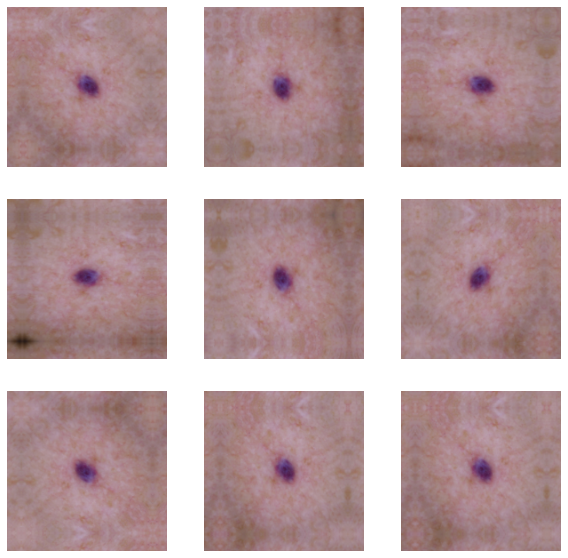

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
   for i in range(9):
    ## Passing the retrieved image to Data Augmentation function
    augmented_images = Aug_data(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# **6. Model Building & Training on Augmented Data**

### Todo:
### Create the model, compile and train the model


From the initial model, we identified the Model is Overfitting. To resolve that let use Augmented Data for all images by including in the Sequential function.Also let us add/include Dropout layers in the Model.

Lets see how the Model performs after making these changes.

In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
model_ad = tf.keras.Sequential([Aug_data,
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width,3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.1),
  layers.Conv2D(128, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.1),
  layers.Conv2D(256, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.25),
  layers.Conv2D(512, 3, padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
    
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes,activation='softmax')
])


### Compiling the model

In [20]:
## Your code goes here
model_ad.compile(optimizer='Adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_ad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 53ms/step - loss: 2.1325 - accuracy: 0.1728 - val_loss: 2.1052 - val_accuracy: 0.2550
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0130 - accuracy: 0.2120 - val_loss: 1.9453 - val_accuracy: 0.2975
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 1.8585 - accuracy: 0.3150 - val_loss: 1.8281 - val_accuracy: 0.3333
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 1.7264 - accuracy: 0.3604 - val_loss: 1.8570 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 1.7085 - accuracy: 0.3534 - val_loss: 1.7527 - val_accuracy: 0.3915
Epoch 6/20
56/56 [==============================] - 2s 44ms/step - loss: 1.7176 - accuracy: 0.3804 - val_loss: 1.6918 - val_accuracy: 0.3848
Epoch 7/20
56/56 [==============================] - 2s 44ms/step - loss: 1.6061 - accuracy: 0.4098 - val_loss: 1.6711 - val_accuracy: 0.3937
Epoch 8/20
56

### Visualizing the results

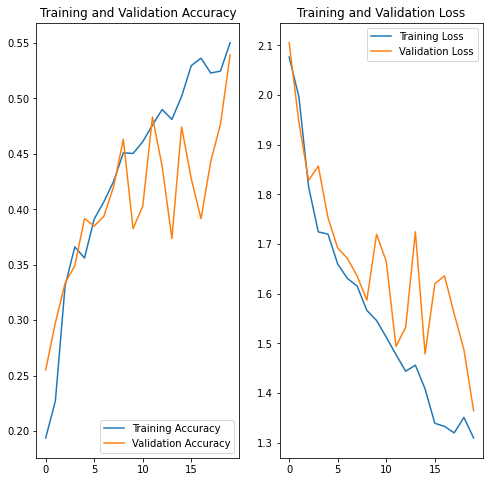

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### **Inferences from Model Build on Augmented Data:**
1. To build CNN Model on Augmented Data, have included/added 4 Convolution layers, 4 Pooling Layers and Fully Connected (FC) layer.
2. For this model considered 'Adamax' as Optimizer Algorithm.
3. As mentioned earlier since being Multi-Class Classification Problem,  considered "SparseCategoricalCrossentropy" as the better/good Loss function.
4. For this CNN Model, we have included Data Augmentation function to apply augmentation for all images/samples. With the 'Adamax' optimizer and "SparseCategoricalCrossentropy" Loss function, we have compiled and Trained the model for 20 Epochs. 
5. By looking at the final result, we could see that Training Accuracy reduced more and it is due to Data Augmentation and got the Training Accuracy score around 55-60 and Validation Accuracy comes around 50. 
6. After applying data augmentation and Dropout, there is less overfitting than Initial Model, and training and validation accuracy are closer aligned.The difference in accuracy scores between training and validation is  **less**. 
7. It is very clear from the result and also by looking at the above accuracy & loss plots, the Model seems to be learning good and with less **Overfitting**/
8. However the Model can be fine tuned further to increase Training and Validation Accuracy to even better values by changing Hyperparameter values.

# **6b. Model Building & Training without Augmented Data**

### Todo:
### Create the model, compile and train the model


From the initial model, we identified the Model is Overfitting. To resolve that let use Augmented Data for all images by including in the Sequential function.Also let us add/include Dropout layers in the Model.

Lets see how the Model performs after making these changes.

In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width,3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.1),
  layers.Conv2D(128, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.1),
  layers.Conv2D(256, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.25),
  layers.Conv2D(512, 3, padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
    
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes,activation='softmax')
])


### Compiling the model

In [24]:
## Your code goes here
model2.compile(optimizer='Adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 43ms/step - loss: 2.1320 - accuracy: 0.2007 - val_loss: 2.0771 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 2s 42ms/step - loss: 2.0262 - accuracy: 0.2210 - val_loss: 2.0348 - val_accuracy: 0.2573
Epoch 3/20
56/56 [==============================] - 2s 42ms/step - loss: 1.8758 - accuracy: 0.3246 - val_loss: 1.8840 - val_accuracy: 0.3132
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.7656 - accuracy: 0.3291 - val_loss: 1.7350 - val_accuracy: 0.3691
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.6760 - accuracy: 0.3734 - val_loss: 1.8325 - val_accuracy: 0.3356
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 1.6446 - accuracy: 0.4186 - val_loss: 1.6738 - val_accuracy: 0.4385
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.6133 - accuracy: 0.4169 - val_loss: 1.5929 - val_accuracy: 0.4452
Epoch 8/20
56

### Visualizing the results

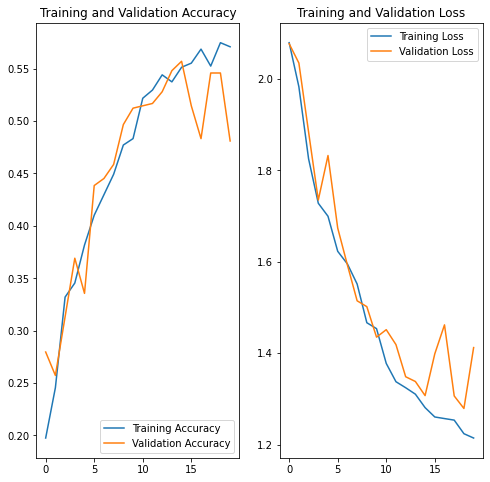

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Inferences from Model Build without Augmented Data:**

> Indented block


1. Built a CNN Model without Augmented Data using  4 Convolution layers, 4 Pooling Layers and Fully Connected (FC) layer.
2. With the 'Adamax' optimizer and "SparseCategoricalCrossentropy" Loss function, have compiled and Trained the model for 20 Epochs. 
3. By looking at the final result, we could see that Training Accuracy improved/increased when compared Augmented Data model and got the Training Accuracy score around 55-60 and Validation Accuracy comes around 50.
5. After applying Dropout, there is less overfitting than Initial Model, and training and validation accuracy are closer aligned.The difference in accuracy scores between training and validation is  **less**. 
6. It is very clear from the result and also by looking at the above plots, the Model seems to be learning good and less **Overfitting**.
7. The scores are same/similar as previous Model. Maybe the given Input images are good and might not require Data Augmentation strategy. Also next we are going to handle Class Imbalance by Augmenting sample images so in the Final Model decided not to use Data Augmentation strategy.

# **7. Class Distribution**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train,'*','*.jpg'))]
dataframe_dict_original = dict(zip(path_list,lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [29]:
## Your code goes here.
image_count = []
for cls in class_names:
  image_count.append(len(list(data_dir_train.glob(cls  + '/*.jpg'))))

df_dict = dict(zip(class_names, image_count))
class_df = pd.DataFrame(list(df_dict.items()),columns = ['Skin Cancer Type','Count'])

class_df['Data Percentage']  = round((class_df['Count']/class_df['Count'].sum()) * 100,2)
class_df.sort_values(by='Data Percentage',ascending=False)

,Skin Cancer Type,Count,Data Percentage
5,pigmented benign keratosis,462,20.63
3,melanoma,438,19.56
1,basal cell carcinoma,376,16.79
4,nevus,357,15.94
7,squamous cell carcinoma,181,8.08
8,vascular lesion,139,6.21
0,actinic keratosis,114,5.09
2,dermatofibroma,95,4.24
6,seborrheic keratosis,77,3.44


### **Inferences from Class Distribution:**

1. From the given dataset, we could see that there are 9 different types/class of Skin Cancer.
2. Out of these 9 classes, "seborrheic keratosis" class has the least number of samples - 77.
3. 'Pigmented Benign Keratosis' Class has the highest proportionate number of samples [20.63% of data]. It is followed by 'Melanoma' with 19.56% data and then
'basal cell carcinoma; with 16.79% data. Please refer the above Dataframe that shows the Data Percentage of all Classes.

# **8. Handling Class Imbalances**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1376037750>: 100%|██████████| 500/500 [00:16<00:00, 31.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1376037650>: 100%|██████████| 500/500 [00:15<00:00, 31.70 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1376041B10>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F13760BC8D0>: 100%|██████████| 500/500 [00:16<00:00, 31.21 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1376068D90>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F1376086F10>: 100%|██████████| 500/500 [01:21<00:00,  6.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1378309ED0>: 100%|██████████| 500/500 [00:16<00:00, 30.44 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F13763D41D0>: 100%|██████████| 500/500 [00:39<00:00, 12.79 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1376083A90>: 100%|██████████| 500/500 [00:16<00:00, 30.96 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F13D7365E50>: 100%|██████████| 500/500 [00:16<00:00, 29.79 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print('Total Number of Images Augmented:',image_count_train)

Total Number of Images Augmented: 4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# **9. Model Building & Training on Rectified Class imbalance data**

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here
model_fin = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width,3)),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  layers.Dropout(0.1),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(pool_size=(3, 3)),
  #layers.BatchNormalization(),
  layers.Dropout(0.2),

  layers.Conv2D(256, 3, padding='same',activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
  #layers.BatchNormalization(),
  layers.Dropout(0.2),

  layers.Conv2D(512, 3, padding='same',activation='relu'),
  #layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  
  layers.Flatten(),
  #layers.Dense(512,kernel_regularizer=regularizers.l2(0.001),activation='relu',),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here
model_fin.compile(optimizer='Adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs = 30
## Your code goes here
history = model_fin.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 35s 199ms/step - loss: 2.1513 - accuracy: 0.2026 - val_loss: 2.1490 - val_accuracy: 0.1685
Epoch 2/30
169/169 [==============================] - 34s 194ms/step - loss: 1.6701 - accuracy: 0.3764 - val_loss: 2.0342 - val_accuracy: 0.2079
Epoch 3/30
169/169 [==============================] - 34s 194ms/step - loss: 1.5519 - accuracy: 0.4197 - val_loss: 1.6342 - val_accuracy: 0.3860
Epoch 4/30
169/169 [==============================] - 34s 195ms/step - loss: 1.4681 - accuracy: 0.4423 - val_loss: 1.6509 - val_accuracy: 0.3950
Epoch 5/30
169/169 [==============================] - 34s 195ms/step - loss: 1.3884 - accuracy: 0.4544 - val_loss: 2.6363 - val_accuracy: 0.3363
Epoch 6/30
169/169 [==============================] - 34s 196ms/step - loss: 1.3272 - accuracy: 0.5005 - val_loss: 1.3939 - val_accuracy: 0.4573
Epoch 7/30
169/169 [==============================] - 34s 196ms/step - loss: 1.2651 - accuracy: 0.5140 - val_loss: 1.2449 - val_ac

#### **Todo:**  Visualize the model results

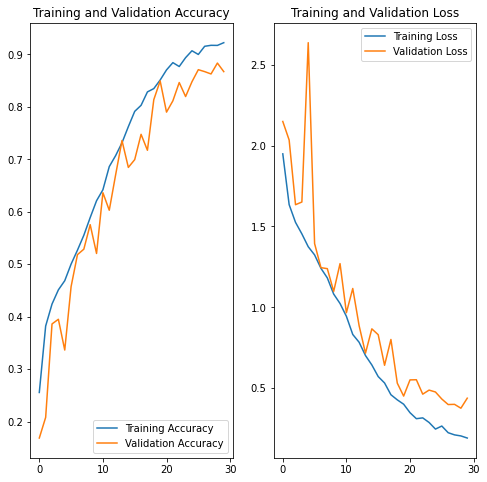

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# **Conclusion**

1. Before Building the Final Model, have rectified the Class Imbalance by using the Augmentor package that creates samples for each Class.
2.After handling Class imbalance we build CNN Model on Rectified Class Imbalanced Data by using 5 Convolution layers (included 1 additional layer compared to previous model), 3 Pooling Layers and Fully Connected (FC) layer.
2. For this model considered 'Adamax' as Optimizer Algorithm.
3. For this CNN Model, we have used 'Adamax' optimizer and "SparseCategoricalCrossentropy" Loss function. Have compiled and Trained the model for 30 Epochs. 
4. By looking at the final result, we could see that Training Accuracy increased well and got the Accuracy score around 90 and Validation Accuracy comes around 80-85. 
5. After applying Batch Normalization and Dropout, the Model seems to learn well in both Training and Validation Sets. There is no overfitting like previous Models, and also training and validation accuracy scores are closer aligned.The difference in accuracy scores between training and validation is   **less**. 
6. It is very clear from the result and also by looking at the above plots, the Model seems to be learning very good and with no **Overfitting**.
7. The performance of CNNs depends on multiple hyperparameters - the number of layers, number of feature maps in each layer, the use of dropouts, batch normalisation, etc. After making different Hyperparameters tuning and handling of Class Imbalance data the Model produced good result.